# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from warnings import simplefilter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('downloads/dataset/gold_recovery_train_new.csv')
data_test = pd.read_csv('downloads/dataset/gold_recovery_test_new.csv')
data_full = pd.read_csv('downloads/dataset/gold_recovery_full_new.csv')
simplefilter(action='ignore', category=FutureWarning)

### Изучение файлов

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
#тренировочная выборка
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
#тестовая выборка
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
#полная выборка
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверка правильности рассчетов

**recovery = (c*(f-t) / f*(c-t))*100%**
 - c = доля золота в концентрате после флотации rougher.output.concentrate_au
 - f = доля золота в сырье до флотации rougher.input.feed_au
 - t = доля золота в отвальных хвостах rougher.output.tail_au

In [9]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery_1_train = (c*(f-t)) / (f*(c-t))*100
data_train['test'] = recovery_1_train
MAE = mean_absolute_error(data_train['rougher.output.recovery'],data_train['test'])
print('Средняя абсолютная ошибка между моими рассчетами и данными в датасете:',MAE)

Средняя абсолютная ошибка между моими рассчетами и данными в датасете: 9.73512347450521e-15


**Исходя из результата выше можно полагать что эффективность обогащения рассчитана правильно**

In [10]:
#удалю столбец тест который я создавал для рассчетов
data_train = data_train.drop(['test'],axis=1)

### Анализ признаков недоступных в тестовой выборке

In [11]:
data_train_columns = data_train.columns
data_test_columns = data_test.columns
datas_difference = list(set(data_train_columns) - set(data_test_columns)) 

In [12]:
#я скопировал список datas_difference и перезаписал его в переменную difference
#я так сделал потому что в datas_difference при каждом обновлении менялись индексы значений
#поэтому я переназначил переменную 'закрепив' индексы

difference = ['rougher.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_ag',
 'final.output.recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'rougher.output.recovery',
 'final.output.tail_au',
 'final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au']
#удалю из списка таргеты так как они должны остаться в датасете
I = [3, 20]
difference = np.delete(difference, I).tolist()
#удалю из тренировочной выборки колонки которых нет в тестовой выборке
data_train_2 = data_train.drop(columns=difference,axis=1)
#к тестовой выборке добавлю колонки с таргетами
data_test_2 = pd.concat([data_test, data_full[['rougher.output.recovery', 'final.output.recovery']]], axis=1).dropna()
data_train_2 = data_train_2.drop(['date'], axis=1)
data_test_2 = data_test_2.drop(['date'], axis=1)

In [13]:
data_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       14149 non-null  float64
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

In [14]:
data_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5229 non-null   float64
 1   primary_cleaner.input.depressant            5229 non-null   float64
 2   primary_cleaner.input.feed_size             5229 non-null   float64
 3   primary_cleaner.input.xanthate              5229 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5229 non-null   float64
 10  primary_clea

**На данном этапе мне удалось уровнять тестовую и тренировочную выборки по колличеству колонок**

### Предобработка данных

In [15]:
#тренировочная выборка
data_train.isna().sum().sort_values(ascending = False).head(60)

secondary_cleaner.output.tail_sol                     1605
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_xanthate                     428
primary_cleaner.output.concentrate_sol                 286
secondary_cleaner.state.floatbank2_a_air               217
final.output.concentrate_sol                           211
rougher.input.feed_size                                144
primary_cleaner.input.xanthate                         100
rougher.input.feed_pb                                  100
final.output.tail_pb                                   100
primary_cleaner.output.concentrate_pb                   86
rougher.input.feed_sol                                  78
primary_cleaner.output.tail_sol                         46
rougher.input.floatbank11_sulfate                       36
primary_cleaner.input.depressant                        32
rougher.input.floatbank10_sulfate                       29
rougher.output.concentrate_sol                          

In [16]:
#тестовая выборка
data_test.isna().sum().sort_values(ascending = False).head(60)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

In [17]:
#полная выборка
data_full.isna().sum().sort_values(ascending = False).head(60)

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

In [18]:
print('Колличесвто пропусков в тренировочной выборке:',data_train_2.isna().sum().sum())
print('Колличесвто пропусков в тестовой выборке:',data_test_2.isna().sum().sum())
print('Колличесвто пропусков в полной выборке:',data_full.isna().sum().sum())

Колличесвто пропусков в тренировочной выборке: 1705
Колличесвто пропусков в тестовой выборке: 0
Колличесвто пропусков в полной выборке: 4481


In [19]:
data_train_2 = data_train_2.fillna(-1)
data_test_2 = data_test_2.fillna(-1)
data_full = data_full.fillna(-1)
print('Колличесвто пропусков в тренировочной выборке:',data_train_2.isna().sum().sum())
print('Колличесвто пропусков в тестовой выборке:',data_test_2.isna().sum().sum())
print('Колличесвто пропусков в полной выборке:',data_full.isna().sum().sum())

Колличесвто пропусков в тренировочной выборке: 0
Колличесвто пропусков в тестовой выборке: 0
Колличесвто пропусков в полной выборке: 0


**Я открыл и изучил данные.Заменил пропуски значением -1 просто чтобы отделить их от реальных значений.В тренировочной выборке удилил колонки которых нет в тестовой,а к тестовой выборке добавил целевые признаки из полной выборки**

## Анализ данных

###   Изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [20]:
def hists(x,y,z,title):
    plt.hist(x, label='сырье')
    plt.hist(y, label='черновой концентрат')
    plt.hist(z, label='финальный концентрат')
    plt.legend(loc='upper right')
    plt.title(title)
    return plt.show()

#запишу нужные столбцы для Aurum
x_au = data_full['rougher.output.concentrate_au']
y_au = data_full['primary_cleaner.output.concentrate_au']
z_au = data_full['final.output.concentrate_au']
#запишу нужные столбцы для Аrgentum
x_ag = data_full['rougher.output.concentrate_ag']
y_ag = data_full['primary_cleaner.output.concentrate_ag']
z_ag = data_full['final.output.concentrate_ag']
#запишу нужные столбцы для Plumbum
x_pb = data_full['rougher.output.concentrate_pb']
y_pb = data_full['primary_cleaner.output.concentrate_pb']
z_pb = data_full['final.output.concentrate_pb']

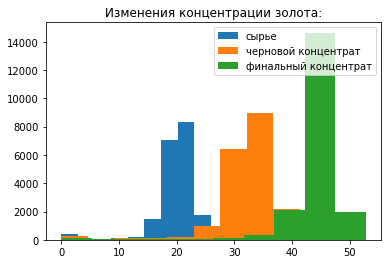

In [21]:
Aurum = hists(x_au,y_au,z_au,'Изменения концентрации золота:');

**Мы можем наблюдать как концентрация золота растет от этапа к этапу**

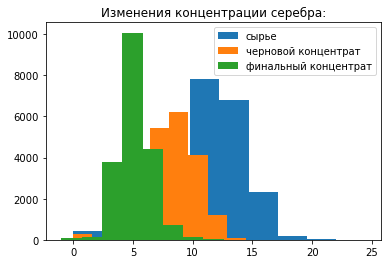

In [22]:
Аrgentum = hists(x_ag,y_ag,z_ag,'Изменения концентрации серебра:')

**Концентрация серебра так же растет**

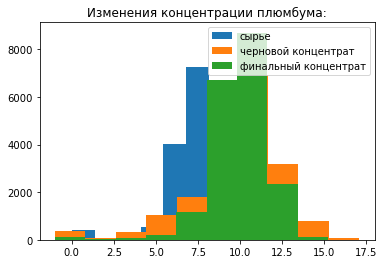

In [23]:
Plumbum = hists(x_pb,y_pb,z_pb,'Изменения концентрации плюмбума:')

**На финальном этапе плюмбум остается примерно на том же уровне что и  в черновом концентрате**

### Распределения размеров гранул сырья на обучающей и тестовой выборках

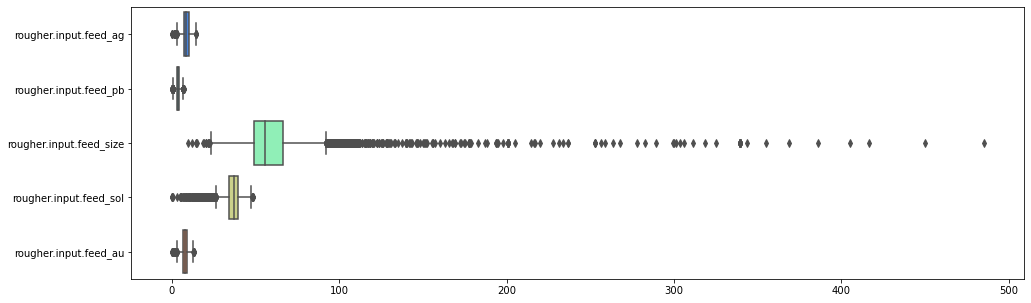

In [24]:
data_train_feed = data_train[['rougher.input.feed_ag','rougher.input.feed_pb',
                            'rougher.input.feed_size',
                            'rougher.input.feed_sol','rougher.input.feed_au']] 

fig, ax = plt.subplots(1,1,figsize=(16, 5))
sns.boxplot(data=data_train_feed, palette='rainbow', orient='h');

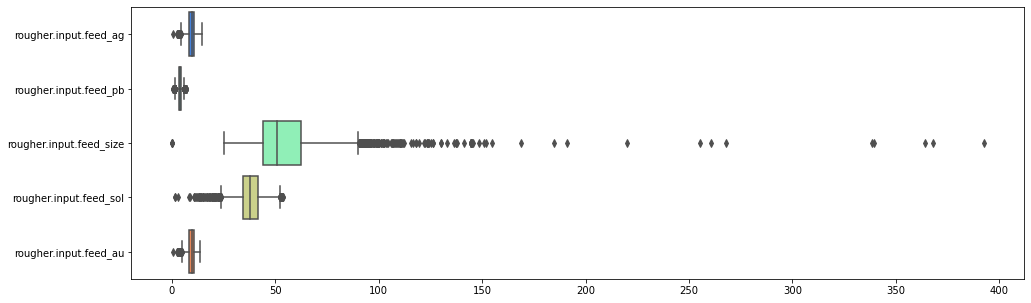

In [25]:
data_test_feed = data_test[['rougher.input.feed_ag','rougher.input.feed_pb',
                            'rougher.input.feed_size',
                            'rougher.input.feed_sol','rougher.input.feed_au']]
fig, ax = plt.subplots(1,1,figsize=(16, 5))
sns.boxplot(data=data_test_feed, palette='rainbow', orient='h');

**В данном случае мы видим что распределение гранул сырья в тестовой и тренировочной выборке практически идентичны,но немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале 40—100**

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

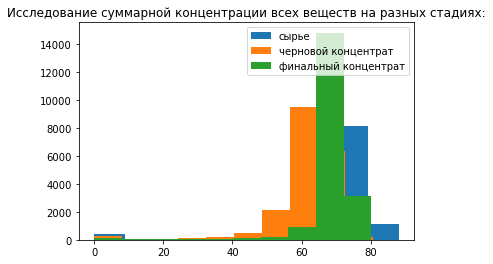

In [26]:
#для начала из пункта 2.1 скопирую уже имеющиеся у меня переменные 
#для AU
x_au = data_full['rougher.output.concentrate_au']
y_au = data_full['primary_cleaner.output.concentrate_au']
z_au = data_full['final.output.concentrate_au']
#для AG
x_ag = data_full['rougher.output.concentrate_ag']
y_ag = data_full['primary_cleaner.output.concentrate_ag']
z_ag = data_full['final.output.concentrate_ag']
#для PB
x_pb = data_full['rougher.output.concentrate_pb']
y_pb = data_full['primary_cleaner.output.concentrate_pb']
z_pb = data_full['final.output.concentrate_pb']
#и добавлю новые переменные для солей
x_sol = data_full['rougher.output.concentrate_sol']
y_sol = data_full['primary_cleaner.output.concentrate_sol']
z_sol = data_full['final.output.concentrate_sol']
#сумирую переменные для каждого этапа
x = x_au + x_ag + x_pb + x_sol #сырье
y = y_au + y_ag + y_pb + y_sol #черновой концентрат
z = z_au + z_ag + z_pb + z_sol #финальный концентрат
#и теперь отправляю все это в мою функцию hists
Concentrates = hists(x,y,z,'Исследование суммарной концентрации всех веществ на разных стадиях:')

**Сумарная концентрация веществ растет к финальному этапу**

## Модель

### Функция для вычисления итоговой sMAPE

In [27]:
#функции для вычисления sMAPE и Final sMAPE
def smape(predictions, target):
    return 100/len(predictions) * np.sum(2 * np.abs(target - predictions) / (np.abs(predictions) + np.abs(target)))

def outcome_smape(smape_rougher,smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

**Функции для оценки моделей**

### Обучение разных моделей и оценка их качества кросс-валидацией

In [28]:
#функции для разбиения выборок на признаки
def sample_rougher(data):
    features = data.drop(['rougher.output.recovery'], axis=1) 
    target = data['rougher.output.recovery']
    return features,target

def sample_final(data):
    features = data.drop(['final.output.recovery'], axis=1) 
    target = data['final.output.recovery']
    return features,target

In [29]:
#функции для кросс-валидации
#дерево решений
def model_tree(features,target):
    model = DecisionTreeRegressor()
    sMAPE = make_scorer(smape) 
    score = cross_val_score(model, features,target,scoring=sMAPE, cv=5)
    return score.mean()    
#случайный лес
def model_forest(features,target):
    model = RandomForestRegressor()
    sMAPE = make_scorer(smape) 
    score = cross_val_score(model, features,target,scoring=sMAPE, cv=5)
    return score.mean()
#линейная регрессия
def model_regression(features,target):
    model = LinearRegression()
    sMAPE = make_scorer(smape) 
    score = cross_val_score(model, features,target,scoring=sMAPE, cv=5)
    return score.mean()

In [30]:
#дамми классификатор
def Dummy(features,target):
    sMAPE = make_scorer(smape)
    dummy_regr = DummyRegressor(strategy="mean",).fit(features,target)
    score = cross_val_score(dummy_regr, features,target,scoring=sMAPE, cv=5)
    return score.mean()

In [31]:
#разобьем выборку на подвыборки
features_train_rougher,target_train_rougher = sample_rougher(data_train_2)
features_train_final,target_train_final = sample_final(data_train_2)

In [32]:
#приступим к моделям но для начала посчитаем на дамми классификаторе
score_rougher = Dummy(features_train_rougher,target_train_rougher)
score_final = Dummy(features_train_final,target_train_final)
print('Оценка Dummy классификатора для выборки rougher:',score_rougher)
print('Оценка Dummy классификатора для выборки final:',score_rougher)

Оценка Dummy классификатора для выборки rougher: 12.215336413217326
Оценка Dummy классификатора для выборки final: 12.215336413217326


In [33]:
#модель дерево решений
model_tree_rougher_score = model_tree(features_train_rougher,target_train_rougher)
model_tree_final_score = model_tree(features_train_final,target_train_final)

print('Оценка модели дерево решений для выборки rougher',model_tree_rougher_score)
print('Оценка модели дерево решений для выборки final',model_tree_final_score)

Оценка модели дерево решений для выборки rougher 17.12201446849109
Оценка модели дерево решений для выборки final 22.395021377571567


In [34]:
#модель случайного леса
model_forest_rougher_score = model_forest(features_train_rougher,target_train_rougher)
model_forest_final_score = model_forest(features_train_final,target_train_final)
print('Оценка модели случайного леса для выборки rougher',model_forest_rougher_score)
print('Оценка модели случайного леса для выборки final',model_forest_final_score)

Оценка модели случайного леса для выборки rougher 11.704472595351117
Оценка модели случайного леса для выборки final 10.843470692085457


In [35]:
#модель регрессии
model_regression_rougher_score = model_regression(features_train_rougher,target_train_rougher)
model_regression_final_score = model_regression(features_train_final,target_train_final)
print('Оценка модели регрессии для выборки rougher',model_regression_rougher_score)
print('Оценка модели регрессии для выборки final',model_regression_final_score)

Оценка модели регрессии для выборки rougher 12.287843346118695
Оценка модели регрессии для выборки final 12.338353312891098


**Попробую улучшить модели**

In [36]:
#решающее дерево для rougher
parameters_tree = {'max_depth': range (1,13, 2)}
clf = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(clf, parameters_tree, cv=5)
grid.fit(features_train_rougher,target_train_rougher)
grid.best_params_

{'max_depth': 5}

In [37]:
#решающее дерево для final
parameters_tree = {'max_depth': range (1,13, 2)}
clf = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(clf, parameters_tree, cv=5)
grid.fit(features_train_final,target_train_final)
grid.best_params_

{'max_depth': 3}

In [38]:
#случайный лес для rougher
parameters_forest = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
clf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(clf, parameters_forest, cv=2,n_jobs=-1)
grid.fit(features_train_rougher,target_train_rougher)
grid.best_params_

{'max_depth': 3, 'n_estimators': 40}

In [39]:
#случайный лес для final
parameters_forest = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
clf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(clf, parameters_forest, cv=2,n_jobs=-1)
grid.fit(features_train_final,target_train_final)
grid.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [40]:
#теперь проверим модели внеся в них гиперпараметры
#решающее дерево
model_tree_rougher = DecisionTreeRegressor(random_state=42,max_depth=5)
model_tree_final = DecisionTreeRegressor(random_state=42,max_depth=3)
sMAPE = make_scorer(smape) 
score_tree_rougher = cross_val_score(model_tree_rougher, features_train_rougher,target_train_rougher,scoring=sMAPE, cv=5).mean()
score_tree_final = cross_val_score(model_tree_final, features_train_final,target_train_final,scoring=sMAPE, cv=5).mean()
print('Оценка модели дерево решений для выборки rougher',score_tree_rougher)
print('Оценка модели дерево решений для выборки final',score_tree_final)

#случайный лес
model_forest_rougher = RandomForestRegressor(random_state=42,max_depth=3,n_estimators=40)
model_forest_final = RandomForestRegressor(random_state=42,max_depth=3,n_estimators=20)
sMAPE = make_scorer(smape)
score_forest_rougher = cross_val_score(model_forest_rougher, 
                                       features_train_rougher,target_train_rougher,scoring=sMAPE, cv=5).mean()
score_forest_final = cross_val_score(model_forest_final, features_train_final,target_train_final,scoring=sMAPE, cv=5).mean()
print('Оценка модели случайного леса для выборки rougher',score_forest_rougher)
print('Оценка модели случайного леса для выборки final',score_forest_final)

Оценка модели дерево решений для выборки rougher 11.080131540256955
Оценка модели дерево решений для выборки final 9.511286192149777
Оценка модели случайного леса для выборки rougher 10.408981775810789
Оценка модели случайного леса для выборки final 9.139819200737518


**Теперь посчитаю финальный sMape для всех трех моделей и выведу результаты для сравнения**

In [41]:
sMape_for_model_tree = outcome_smape(score_tree_rougher,score_tree_final)
sMape_for_model_forest = outcome_smape(score_forest_rougher,score_forest_final) 
sMape_for_model_regression = outcome_smape(model_regression_rougher_score,model_regression_final_score)

In [42]:
goals =pd.DataFrame({ 'Тест':['sMape_rougher','sMape_final','SMAPE'],
                     'Решающее дерево':[score_tree_rougher,score_tree_final,sMape_for_model_tree],
                     'Случайный лес':[score_forest_rougher,score_forest_final,sMape_for_model_forest],
                     'Регрессия':[model_regression_rougher_score,model_regression_final_score,sMape_for_model_regression]})
                     
goals  

,Тест,Решающее дерево,Случайный лес,Регрессия
0,sMape_rougher,11.080132,10.408982,12.287843
1,sMape_final,9.511286,9.139819,12.338353
2,SMAPE,9.903498,9.457110,12.325726


**Как мы видим из таблицы выше модель случайного леса показала самый высокий результат**

**Теперь проверю модель случайного леса на тестовой выборке**

In [43]:
#разобью тестовую выборку на признаки
features_test_rougher,target_test_rougher = sample_rougher(data_test_2)
features_test_final,target_test_final = sample_final(data_test_2)

In [44]:
model_forest_rougher = RandomForestRegressor(random_state=42,max_depth=3,n_estimators=40)
model_forest_final = RandomForestRegressor(random_state=42,max_depth=3,n_estimators=20)
sMAPE = make_scorer(smape)
score_forest_rougher = cross_val_score(model_forest_rougher, 
                                       features_test_rougher,target_test_rougher,scoring=sMAPE, cv=5).mean()
score_forest_final = cross_val_score(model_forest_final, features_test_final,target_test_final,scoring=sMAPE, cv=5).mean()
print('Оценка модели случайного леса для выборки rougher',score_forest_rougher)
print('Оценка модели случайного леса для выборки final',score_forest_final)

Оценка модели случайного леса для выборки rougher 10.743485431305903
Оценка модели случайного леса для выборки final 8.754579038077424


In [45]:
sMape = outcome_smape(score_forest_rougher,score_forest_final)
print('Финальный показатель sMAPE для модели случайный лес:',sMape)

Финальный показатель sMAPE для модели случайный лес: 9.251805636384542


### Вывод

**Я обучил и проверил три модели.Лучшие показатели sMape показала модель случайного леса.При этом модель решающего дерева так же прошла проверку на адекватность ,так как ее показатели ниже чем показатели Dummy**